In [1]:
# this facilitates inline plotting
%matplotlib inline

# this imports packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import statsmodels.formula.api as sm
import seaborn as sns
import scipy
import sklearn
import statsmodels

from statsmodels.formula.api import ols  # ordinary least squares regression

In [48]:
keep_dept = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 44, 46, 48, 49, 50, 52, 55, 56, 58, 59, 60, 65, 67, 71, 72, 74, 79, 80, 81, 82, 83, 85, 87, 90, 91, 92, 93, 94, 95, 96, 97, 98]
len(keep_dept) # 9 departments dropped, 72 left.

72

In [49]:
#  Define a function to plot multiple time series together
def trendplot(data,group1,xvar,yvar,xlab,ylab,plottitle,fname):
    fig, ax = plt.subplots(figsize = (20,15))
    for title, group in data.groupby(group1):
        ax.plot(group[xvar], group[yvar], label = title)
# Labels   
    plt.xlabel(xlab, fontsize = 16)
    plt.ylabel(ylab, fontsize = 16)
# Ticks    
    plt.yticks(rotation=0, fontsize = 16) 
    plt.xticks(rotation = 90, fontsize = 16)
# Title   
    plt.title(plottitle, fontsize = 16)
# Legend    
#    plt.legend(loc=1)
# Save the figure    
    plt.savefig(fname)
    
#  Define a function to add holiday lines
def holidaylines():
#  Add vlines for holiday dates
    for date in laborday:
        plt.axvline(x=date, color = 'r', linestyle = '--')
    for date in thanksgiving:
        plt.axvline(x=date, color = 'y', linestyle = '--')
    for date in christmas:
        plt.axvline(x=date, color = 'b', linestyle = '--')
    for date in superbowl:
        plt.axvline(x=date, color = 'c', linestyle = '--')

In [50]:
#  Read in data - attempt to force European parsing of dates
stores = pd.read_csv('stores.csv', dayfirst=True)
train = pd.read_csv('train.csv', dayfirst=True)
test = pd.read_csv('test.csv', dayfirst=True)
features = pd.read_csv('features.csv', dayfirst=True)

In [51]:
dates = pd.read_csv('dates.csv', dayfirst=True)
merge = pd.read_csv('merge.csv', dayfirst=True)

#  Create reduced dataframe
merge = (merge.loc[merge['Dept'].isin(keep_dept)])

In [52]:
merge = merge.reset_index()
merge.head()

index  Unnamed: 0  Store  Dept        Date  Weekly_Sales  IsHoliday  \
0      0           0      1     1  05/02/2010      24924.50      False   
1      1           1      1     1  12/02/2010      46039.49       True   
2      2           2      1     1  19/02/2010      41595.55      False   
3      3           3      1     1  26/02/2010      19403.54      False   
4      4           4      1     1  05/03/2010      21827.90      False   

   Temperature  Fuel_Price  Promotion1  Promotion2  Promotion3  Promotion4  \
0        42.31       2.572         NaN         NaN         NaN         NaN   
1        38.51       2.548         NaN         NaN         NaN         NaN   
2        39.93       2.514         NaN         NaN         NaN         NaN   
3        46.63       2.561         NaN         NaN         NaN         NaN   
4        46.50       2.625         NaN         NaN         NaN         NaN   

   Promotion5         CPI  Unemployment Type  Size (sq ft)     Newdate  
0         NaN  211.096358         8.106    A        151315  2010-02-05  
1         NaN  211.242170         8.106    A        151315  2010-02-12  
2         NaN  211.289143         8.106    A        151315  2010-02-19  
3         NaN  211.319643         8.106    A        151315  2010-02-26  
4         NaN  211.350143         8.106    A        151315  2010-03-05

In [53]:
dates['Newdate']=pd.to_datetime(dates['date'], dayfirst = True)
#dates = dates.reset_index()
dates.head()

Week_number        date  year  IsHoliday  holiday    Newdate
0            1  05/02/2010  2010      False        0 2010-02-05
1            2  12/02/2010  2010       True        1 2010-02-12
2            3  19/02/2010  2010      False        0 2010-02-19
3            4  26/02/2010  2010      False        0 2010-02-26
4            5  05/03/2010  2010      False        0 2010-03-05

In [54]:
merge_dates = pd.merge(merge, dates, left_on = 'Date', right_on='date')
merge_dates.head()

index  Unnamed: 0  Store  Dept        Date  Weekly_Sales  IsHoliday_x  \
0      0           0      1     1  05/02/2010      24924.50        False   
1    143         143      1     2  05/02/2010      50605.27        False   
2    286         286      1     3  05/02/2010      13740.12        False   
3    429         429      1     4  05/02/2010      39954.04        False   
4    572         572      1     5  05/02/2010      32229.38        False   

   Temperature  Fuel_Price  Promotion1    ...      Unemployment  Type  \
0        42.31       2.572         NaN    ...             8.106     A   
1        42.31       2.572         NaN    ...             8.106     A   
2        42.31       2.572         NaN    ...             8.106     A   
3        42.31       2.572         NaN    ...             8.106     A   
4        42.31       2.572         NaN    ...             8.106     A   

   Size (sq ft)   Newdate_x  Week_number        date  year  IsHoliday_y  \
0        151315  2010-02-05            1  05/02/2010  2010        False   
1        151315  2010-02-05            1  05/02/2010  2010        False   
2        151315  2010-02-05            1  05/02/2010  2010        False   
3        151315  2010-02-05            1  05/02/2010  2010        False   
4        151315  2010-02-05            1  05/02/2010  2010        False   

  holiday  Newdate_y  
0       0 2010-02-05  
1       0 2010-02-05  
2       0 2010-02-05  
3       0 2010-02-05  
4       0 2010-02-05  

[5 rows x 25 columns]

In [55]:
# This command gives the sum of every variable, grouped by date and store.
wsd = merge_dates.groupby(['Store','Newdate_x']).sum()

#  Reset index and print a list of columns
wsd = wsd.reset_index()
print(wsd.columns.tolist())

['Store', 'Newdate_x', 'index', 'Unnamed: 0', 'Dept', 'Weekly_Sales', 'IsHoliday_x', 'Temperature', 'Fuel_Price', 'Promotion1', 'Promotion2', 'Promotion3', 'Promotion4', 'Promotion5', 'CPI', 'Unemployment', 'Size (sq ft)', 'Week_number', 'year', 'IsHoliday_y', 'holiday']


In [57]:
wsd.head()

Store   Newdate_x   index  Unnamed: 0  Dept  Weekly_Sales  IsHoliday_x  \
0      1  2010-02-05  340398      340398  2987    1643143.30          0.0   
1      1  2010-02-12  340467      340467  2987    1641511.86         69.0   
2      1  2010-02-19  340536      340536  2987    1612139.35          0.0   
3      1  2010-02-26  340605      340605  2987    1409469.02          0.0   
4      1  2010-03-05  340674      340674  2987    1554493.44          0.0   

   Temperature  Fuel_Price  Promotion1   ...     Promotion3  Promotion4  \
0      2919.39     177.468         NaN   ...            NaN         NaN   
1      2657.19     175.812         NaN   ...            NaN         NaN   
2      2755.17     173.466         NaN   ...            NaN         NaN   
3      3217.47     176.709         NaN   ...            NaN         NaN   
4      3208.50     181.125         NaN   ...            NaN         NaN   

   Promotion5           CPI  Unemployment  Size (sq ft)  Week_number    year  \
0         NaN  14565.648716       559.314      10440735           69  138690   
1         NaN  14575.709716       559.314      10440735          138  138690   
2         NaN  14578.950860       559.314      10440735          207  138690   
3         NaN  14581.055360       559.314      10440735          276  138690   
4         NaN  14583.159860       559.314      10440735          345  138690   

   IsHoliday_y  holiday  
0          0.0        0  
1         69.0       69  
2          0.0        0  
3          0.0        0  
4          0.0        0  

[5 rows x 21 columns]

In [58]:
wsd = wsd.drop(['Unnamed: 0', 'Dept', 'IsHoliday_x', 'Temperature', 'Fuel_Price', 'Promotion1', 'Promotion2', 'Promotion3', 'Promotion4', 'Promotion5', 'CPI', 'Unemployment', 'Size (sq ft)', 'Week_number', 'year', 'IsHoliday_y', 'holiday'], axis = 1)
#  Check head
wsd.head()

Store   Newdate_x   index  Weekly_Sales
0      1  2010-02-05  340398    1643143.30
1      1  2010-02-12  340467    1641511.86
2      1  2010-02-19  340536    1612139.35
3      1  2010-02-26  340605    1409469.02
4      1  2010-03-05  340674    1554493.44

In [59]:
#This command gives the sum of every variable, grouped by date and store.
week_no_mean = merge_dates.groupby(['Store','Week_number']).mean()
week_no_mean = week_no_mean.reset_index()
week_no_mean = week_no_mean.drop(['Unnamed: 0', 'Dept', 'IsHoliday_x', 'Temperature', 'Fuel_Price', 'Promotion1', 'Promotion2', 'Promotion3', 'Promotion4', 'Promotion5', 'CPI', 'Unemployment', 'Size (sq ft)', 'year','IsHoliday_y'], axis = 1)
week_no_mean.head()

Store  Week_number        index  Weekly_Sales  holiday
0      1            1  5031.631579  23376.526555      0.0
1      1            2  5032.631579  24365.455837      1.0
2      1            3  5033.631579  24489.865359      0.0
3      1            4  5034.631579  21078.678565      0.0
4      1            5  5035.631579  23341.804737      0.0

**Now to make a visualisation by week number, across all stores of mean sales.**

In [60]:
#  Holiday weeks in a list
holiday_weeks = [2,32,43,48]
holiday_weeks

[2, 32, 43, 48]

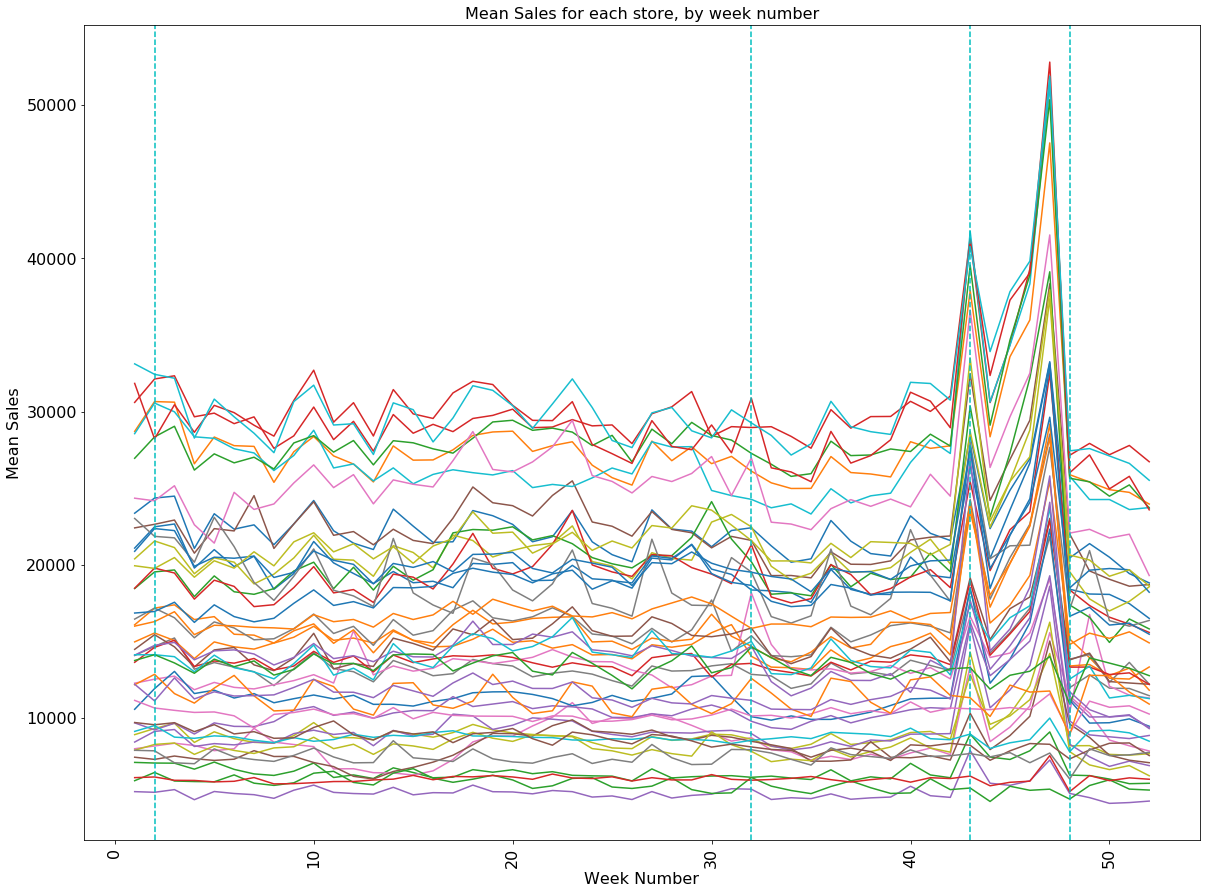

In [61]:
#  Plot of all departments, store 1, sales data by date
trendplot(week_no_mean, 'Store', 'Week_number', 'Weekly_Sales', 'Week Number', 'Mean Sales', 'Mean Sales for each store, by week number', 'mean_no_sales.pdf')
for date in holiday_weeks:
    plt.axvline(x=date, color = 'c', linestyle = '--')
plt.show()

In [64]:
store_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45]
len(store_list) # Check 45 stores

45

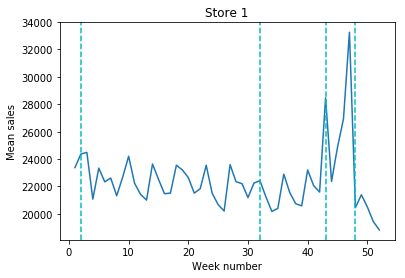

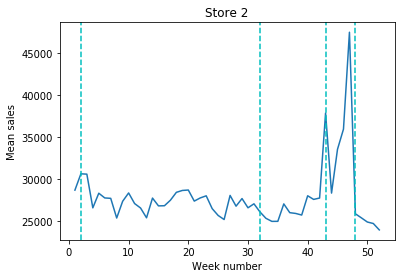

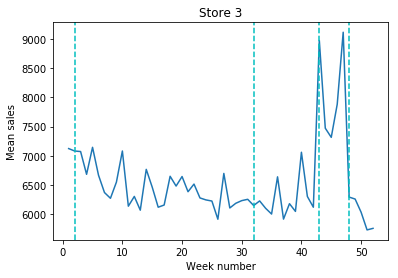

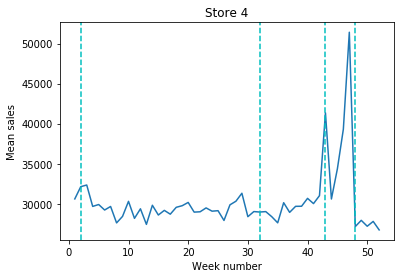

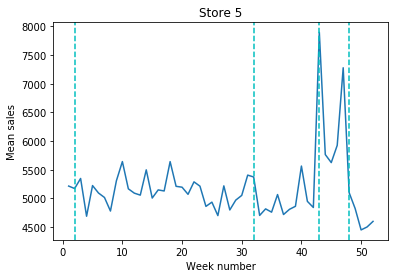

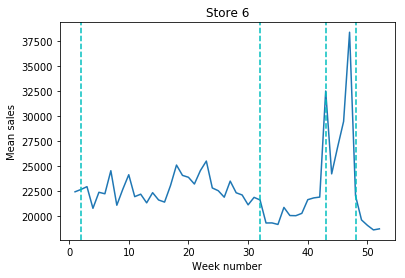

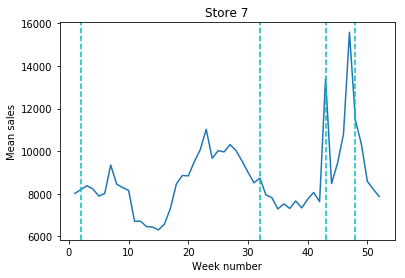

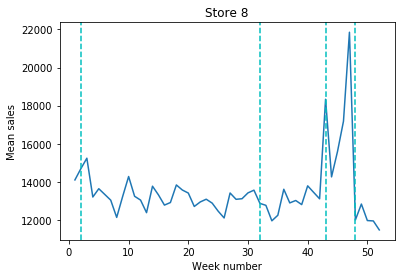

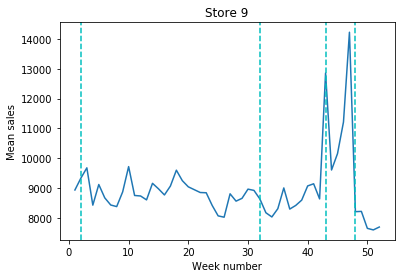

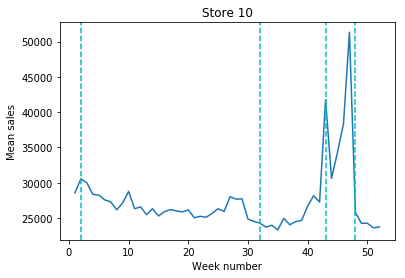

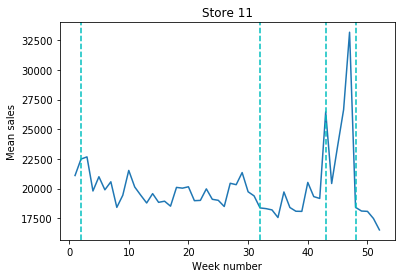

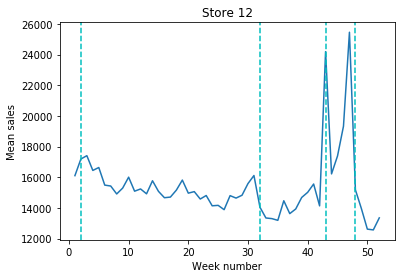

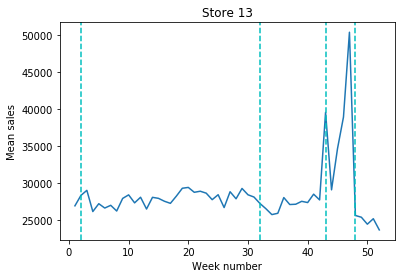

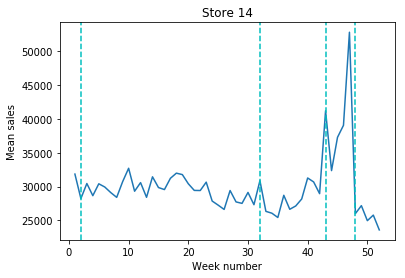

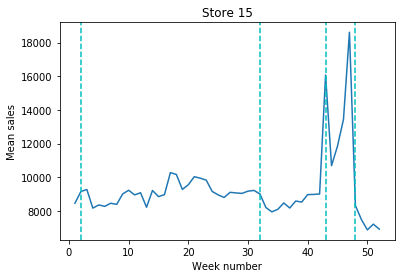

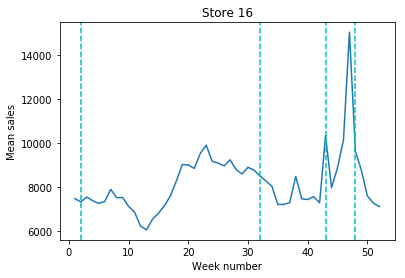

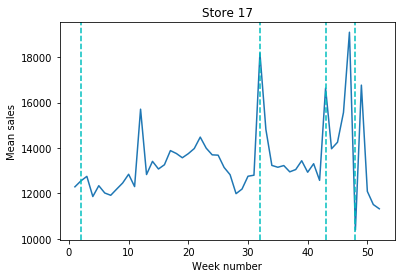

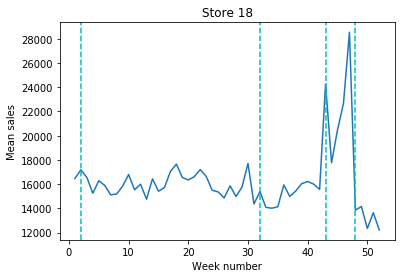

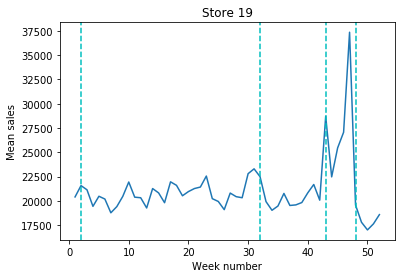

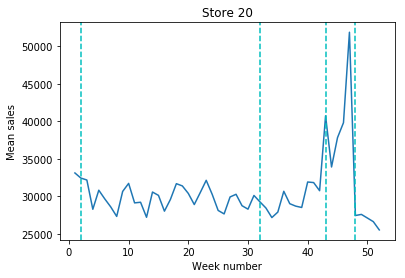

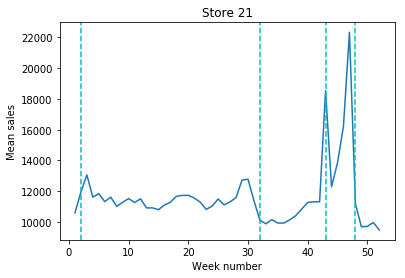

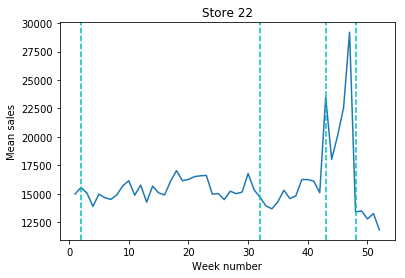

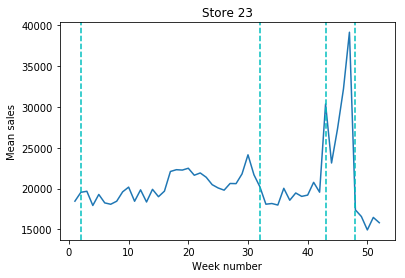

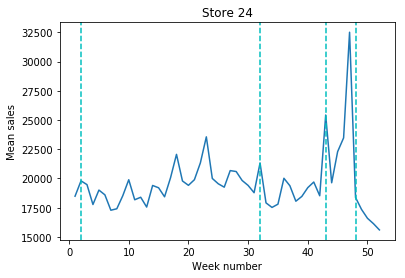

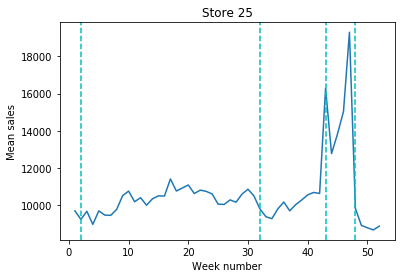

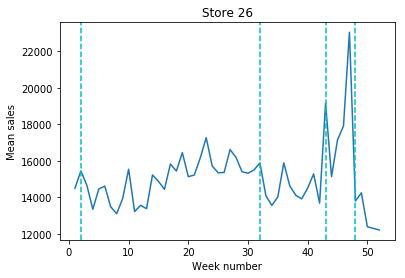

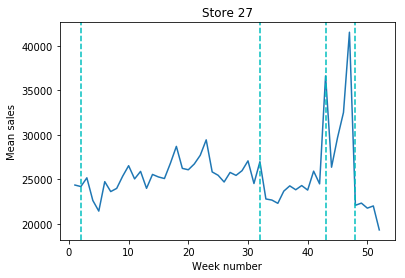

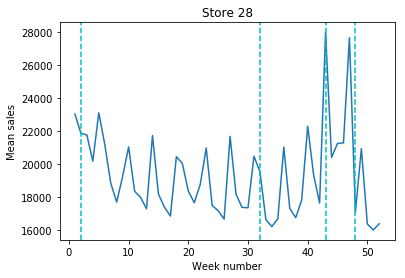

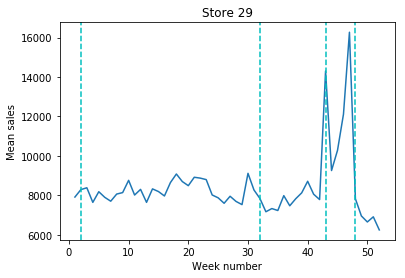

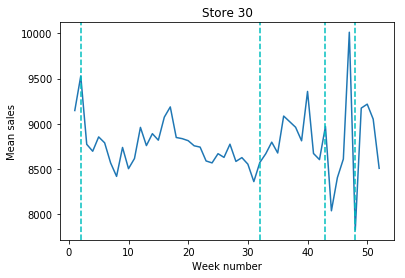

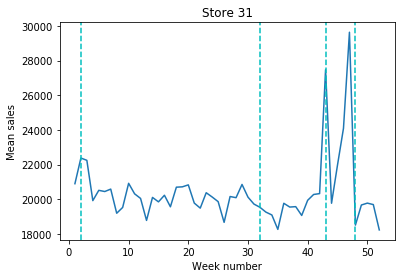

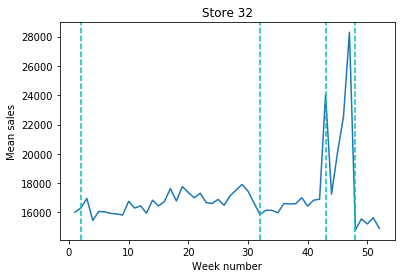

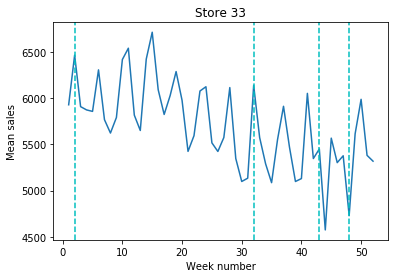

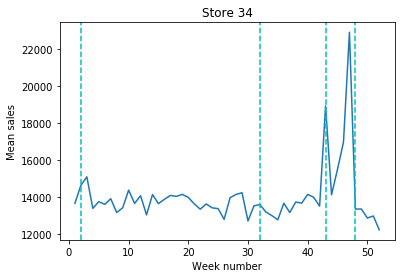

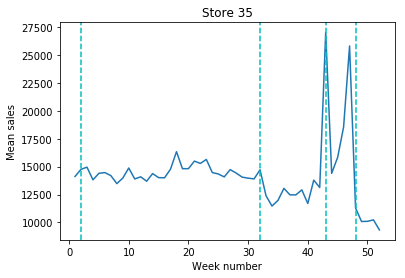

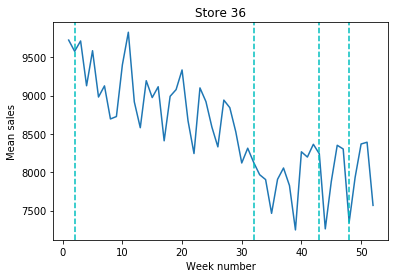

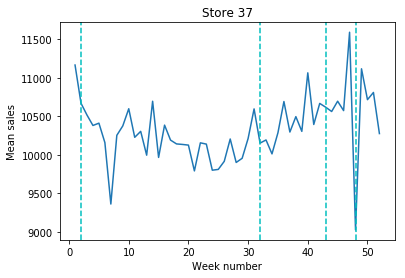

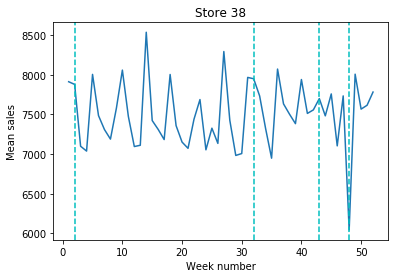

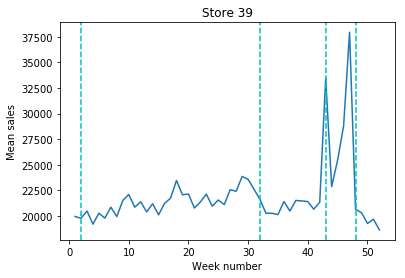

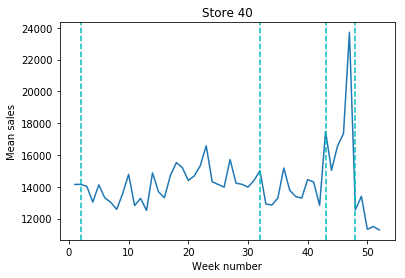

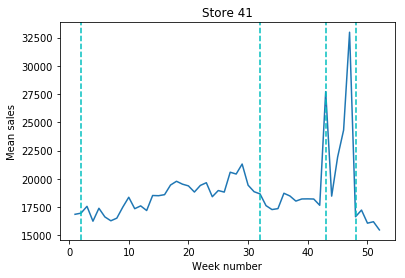

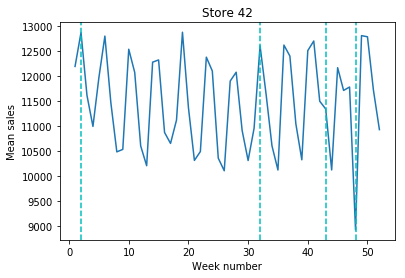

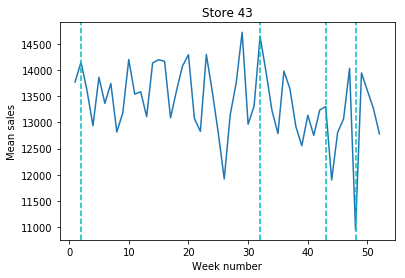

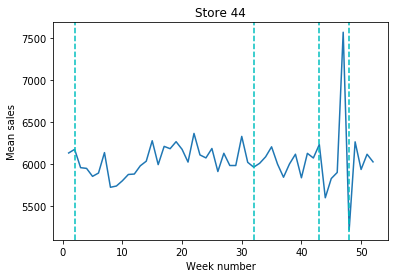

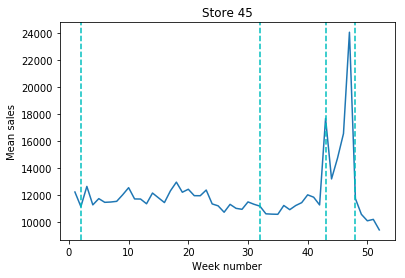

In [65]:
for i in store_list:
    data = week_no_mean.loc[week_no_mean['Store']==i]
    plt.plot(data['Week_number'],data['Weekly_Sales'])
    plt.xlabel('Week number')
    plt.ylabel('Mean sales')
    plt.title('Store %s'%(str(i)))    
    for date in holiday_weeks:
        plt.axvline(x=date, color = 'c', linestyle = '--')
    plt.show()


##  Another look at time series decomposition

Consider store 1.  I will look at the total sales per week of the store.

Take the dataset **wsd** to use for this.  It has had spurious departments cleaned out of it.

For ease, select just store 1 for starters.


In [94]:
ts = wsd.loc[wsd['Store']==1]
ts = ts.filter(['Newdate_x','Weekly_Sales'], axis=1) # set up df - drop extra columns
ts = ts.set_index('Newdate_x') #  set index to datetime
ts # print time series

Weekly_Sales
Newdate_x               
2010-02-05    1643143.30
2010-02-12    1641511.86
2010-02-19    1612139.35
2010-02-26    1409469.02
2010-03-05    1554493.44
2010-03-12    1439955.83
2010-03-19    1472411.35
2010-03-26    1404220.38
2010-04-02    1594734.03
2010-04-09    1545166.32
2010-04-16    1465806.63
2010-04-23    1391095.23
2010-04-30    1424722.51
2010-05-07    1603521.82
2010-05-14    1494115.88
2010-05-21    1399511.12
2010-05-28    1431670.61
2010-06-04    1615212.79
2010-06-11    1542292.37
2010-06-18    1503040.07
2010-06-25    1422394.92
2010-07-02    1492167.09
2010-07-09    1545781.22
2010-07-16    1448725.49
2010-07-23    1384615.20
2010-07-30    1371688.56
2010-08-06    1605340.66
2010-08-13    1508109.20
2010-08-20    1512978.25
2010-08-27    1449016.92
...                  ...
2012-04-06    1899416.16
2012-04-13    1621011.70
2012-04-20    1521553.83
2012-04-27    1468866.53
2012-05-04    1684469.99
2012-05-11    1610976.13
2012-05-18    1595841.87
2012-05-25    1555369.63
2012-06-01    1624453.66
2012-06-08    1697018.16
2012-06-15    1630327.00
2012-06-22    1527785.93
2012-06-29    1540421.49
2012-07-06    1769833.40
2012-07-13    1526985.10
2012-07-20    1497880.83
2012-07-27    1439067.75
2012-08-03    1631107.79
2012-08-10    1592292.15
2012-08-17    1597863.11
2012-08-24    1494114.31
2012-08-31    1582034.42
2012-09-07    1661743.43
2012-09-14    1517381.92
2012-09-21    1506073.71
2012-09-28    1436778.32
2012-10-05    1670078.05
2012-10-12    1572892.50
2012-10-19    1508039.85
2012-10-26    1493633.92

[143 rows x 1 columns]

In [96]:
ts = ts.reset_index()
ts['Newdate_x']=pd.to_datetime(ts['Newdate_x'], dayfirst = True)
ts.head()

Newdate_x  Weekly_Sales
0 2010-02-05    1643143.30
1 2010-02-12    1641511.86
2 2010-02-19    1612139.35
3 2010-02-26    1409469.02
4 2010-03-05    1554493.44

In [100]:
ts = ts.set_index('Newdate_x')
ts.head()

Weekly_Sales
Newdate_x               
2010-02-05    1643143.30
2010-02-12    1641511.86
2010-02-19    1612139.35
2010-02-26    1409469.02
2010-03-05    1554493.44

## To use decomposition of the time series, to examine trend and seasonality.  

Defined a function **decompose_plot** to run the time series decomposition over all 45 stores.  This is on aggregate sales for each store, per week.

This code runs a 

In [101]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [166]:
def decompose_plot(data):    
    plt.subplot(411)
    plt.plot(data, label='Original')
    plt.legend(loc='best')
    plt.title('Store %s'%(str(i)), loc = 'center')
    plt.subplot(412)
    plt.plot(seasonal_decompose(data).trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal_decompose(data).seasonal,label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(seasonal_decompose(data).resid, label='Residuals')
    plt.legend(loc='best')
    plt.tight_layout()
    
#stores_test = [1,2,3]

##  Look at Store 1 for ease.

Weekly_Sales


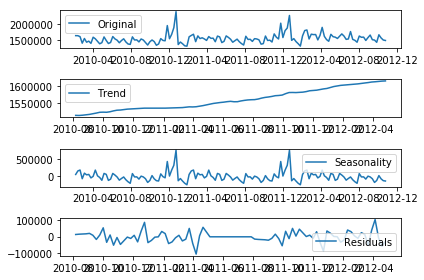

In [160]:
ts1 = wsd.loc[wsd['Store']==1]
ts1 = ts1.reset_index() #  set index to datetime
ts1 = ts1.filter(['Newdate_x','Weekly_Sales'], axis=1)
ts1['Newdate_x']=pd.to_datetime(ts1['Newdate_x'], dayfirst = True)
ts1 = ts1.set_index('Newdate_x')
plt.figure(1)
decompose_plot(ts1)


In [179]:
ts1

Weekly_Sales
Newdate_x               
2010-02-05    1643143.30
2010-02-12    1641511.86
2010-02-19    1612139.35
2010-02-26    1409469.02
2010-03-05    1554493.44
2010-03-12    1439955.83
2010-03-19    1472411.35
2010-03-26    1404220.38
2010-04-02    1594734.03
2010-04-09    1545166.32
2010-04-16    1465806.63
2010-04-23    1391095.23
2010-04-30    1424722.51
2010-05-07    1603521.82
2010-05-14    1494115.88
2010-05-21    1399511.12
2010-05-28    1431670.61
2010-06-04    1615212.79
2010-06-11    1542292.37
2010-06-18    1503040.07
2010-06-25    1422394.92
2010-07-02    1492167.09
2010-07-09    1545781.22
2010-07-16    1448725.49
2010-07-23    1384615.20
2010-07-30    1371688.56
2010-08-06    1605340.66
2010-08-13    1508109.20
2010-08-20    1512978.25
2010-08-27    1449016.92
...                  ...
2012-04-06    1899416.16
2012-04-13    1621011.70
2012-04-20    1521553.83
2012-04-27    1468866.53
2012-05-04    1684469.99
2012-05-11    1610976.13
2012-05-18    1595841.87
2012-05-25    1555369.63
2012-06-01    1624453.66
2012-06-08    1697018.16
2012-06-15    1630327.00
2012-06-22    1527785.93
2012-06-29    1540421.49
2012-07-06    1769833.40
2012-07-13    1526985.10
2012-07-20    1497880.83
2012-07-27    1439067.75
2012-08-03    1631107.79
2012-08-10    1592292.15
2012-08-17    1597863.11
2012-08-24    1494114.31
2012-08-31    1582034.42
2012-09-07    1661743.43
2012-09-14    1517381.92
2012-09-21    1506073.71
2012-09-28    1436778.32
2012-10-05    1670078.05
2012-10-12    1572892.50
2012-10-19    1508039.85
2012-10-26    1493633.92

[143 rows x 1 columns]

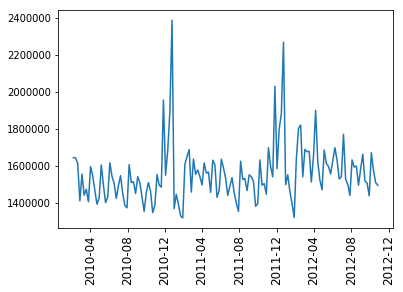

In [189]:
plt.figure()
plt.plot(ts1)
plt.xticks(rotation = 90, fontsize = 12)
plt.show()

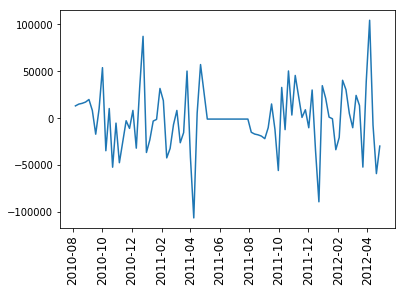

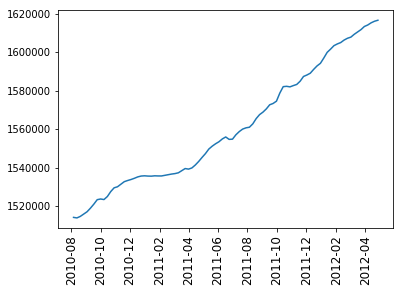

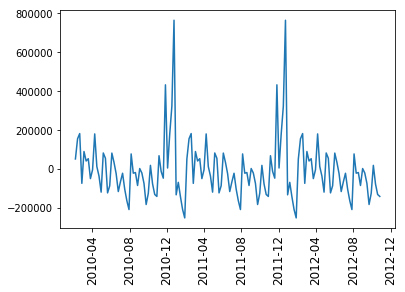

In [188]:
plt.figure(1)
plt.plot(seasonal_decompose(ts1).resid)
plt.xticks(rotation = 90, fontsize = 12)
plt.show()

plt.figure(2)
plt.plot(seasonal_decompose(ts1).trend)
plt.xticks(rotation = 90, fontsize = 12)
plt.show()

plt.figure(3)
plt.plot(seasonal_decompose(ts1).seasonal)
plt.xticks(rotation = 90, fontsize = 12)
plt.show()

In [183]:
seasonal_decompose(ts1).resid




Weekly_Sales
Newdate_x                
2010-02-05            NaN
2010-02-12            NaN
2010-02-19            NaN
2010-02-26            NaN
2010-03-05            NaN
2010-03-12            NaN
2010-03-19            NaN
2010-03-26            NaN
2010-04-02            NaN
2010-04-09            NaN
2010-04-16            NaN
2010-04-23            NaN
2010-04-30            NaN
2010-05-07            NaN
2010-05-14            NaN
2010-05-21            NaN
2010-05-28            NaN
2010-06-04            NaN
2010-06-11            NaN
2010-06-18            NaN
2010-06-25            NaN
2010-07-02            NaN
2010-07-09            NaN
2010-07-16            NaN
2010-07-23            NaN
2010-07-30            NaN
2010-08-06   13090.399548
2010-08-13   14993.549163
2010-08-20   15820.966567
2010-08-27   17163.633683
...                   ...
2012-04-06  104311.559356
2012-04-13   -7349.060548
2012-04-20  -59028.458817
2012-04-27  -29707.486366
2012-05-04            NaN
2012-05-11            NaN
2012-05-18            NaN
2012-05-25            NaN
2012-06-01            NaN
2012-06-08            NaN
2012-06-15            NaN
2012-06-22            NaN
2012-06-29            NaN
2012-07-06            NaN
2012-07-13            NaN
2012-07-20            NaN
2012-07-27            NaN
2012-08-03            NaN
2012-08-10            NaN
2012-08-17            NaN
2012-08-24            NaN
2012-08-31            NaN
2012-09-07            NaN
2012-09-14            NaN
2012-09-21            NaN
2012-09-28            NaN
2012-10-05            NaN
2012-10-12            NaN
2012-10-19            NaN
2012-10-26            NaN

[143 rows x 1 columns]

This code runs a standard decomposition as an iterative process and plots original, trend, seasonality and residuals as a separate figure for **each store**.

/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


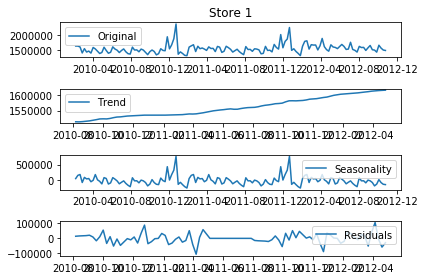

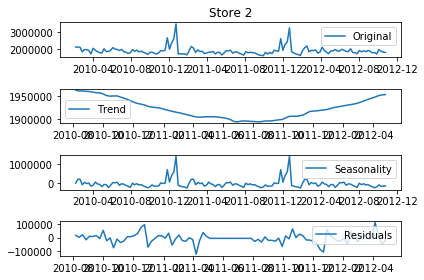

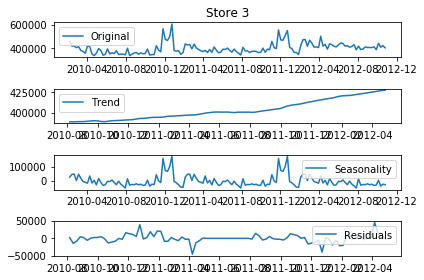

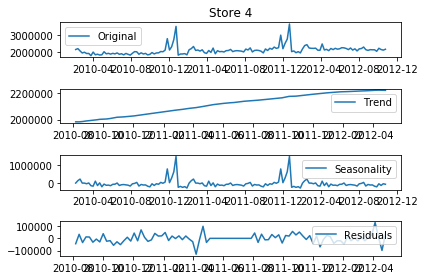

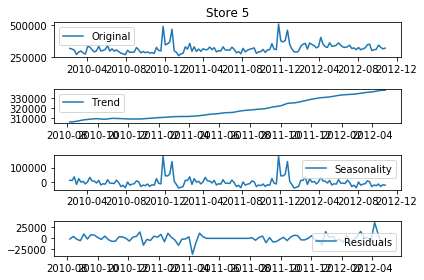

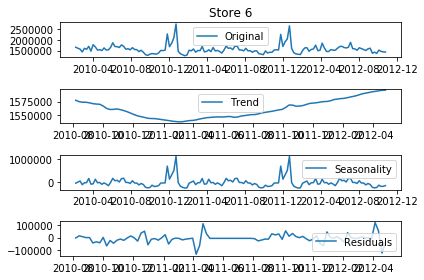

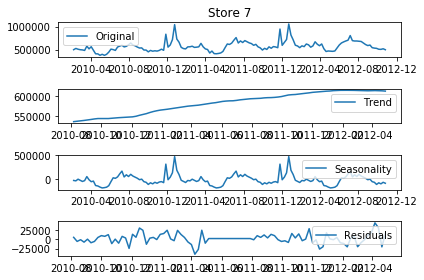

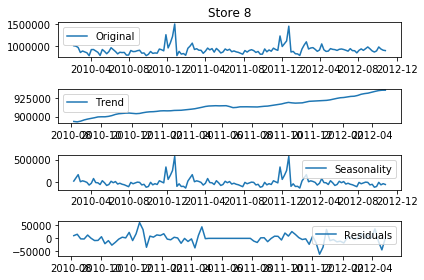

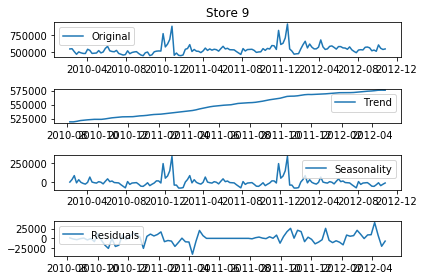

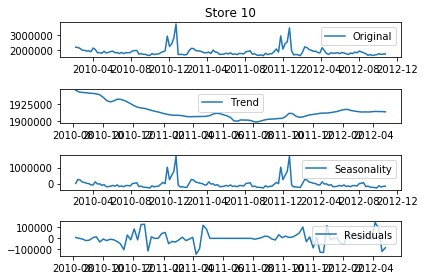

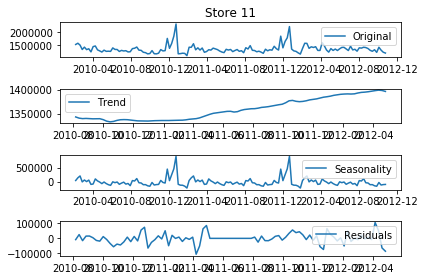

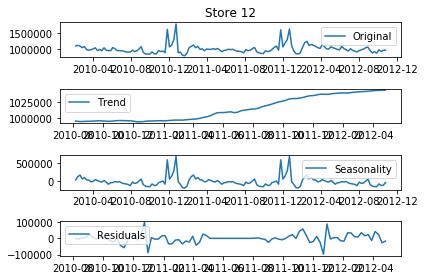

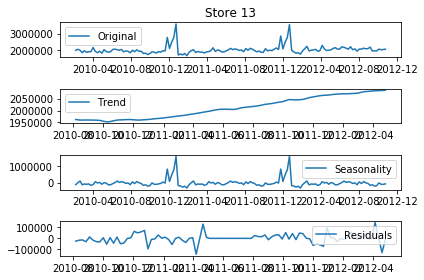

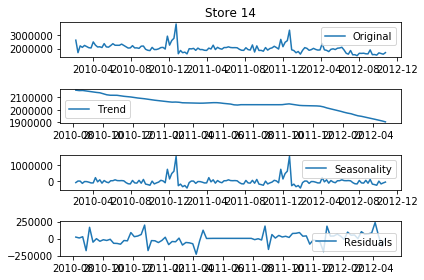

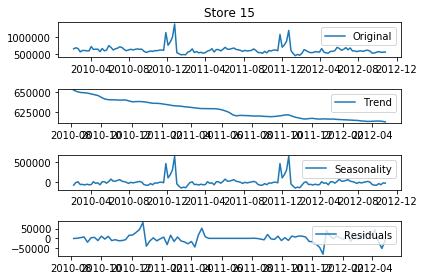

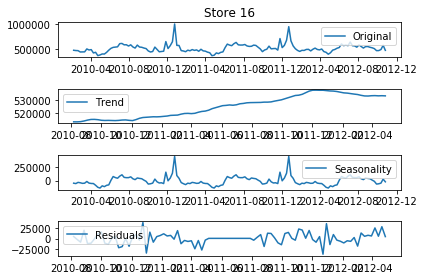

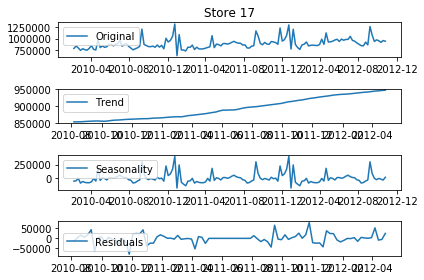

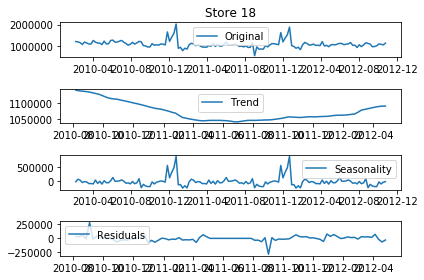

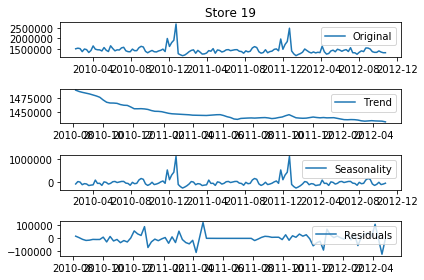

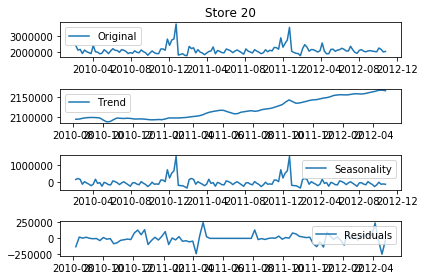

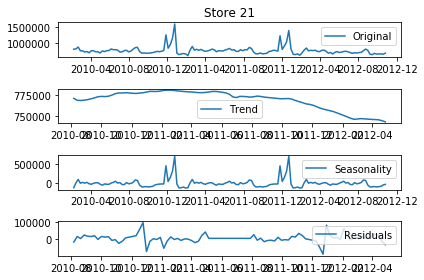

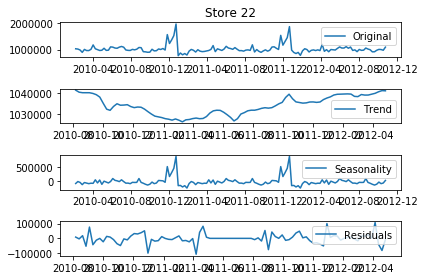

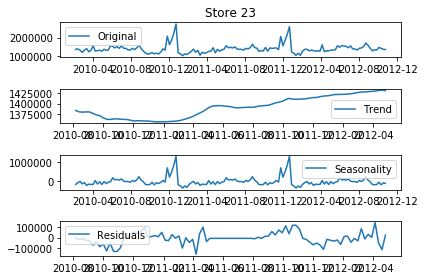

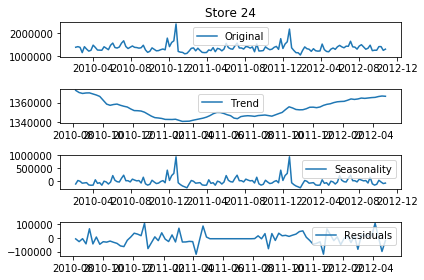

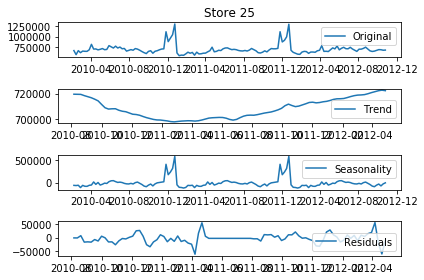

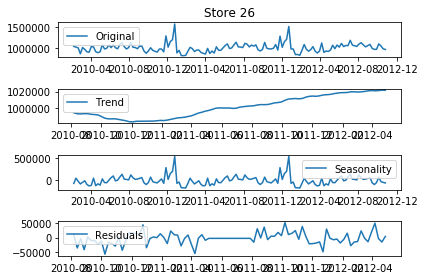

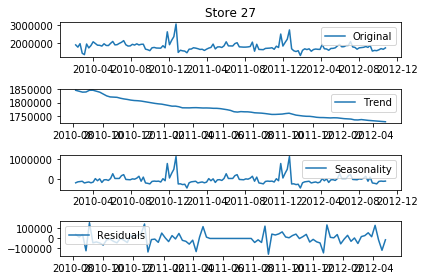

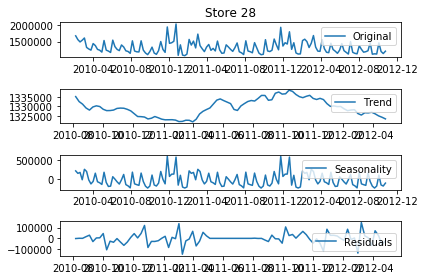

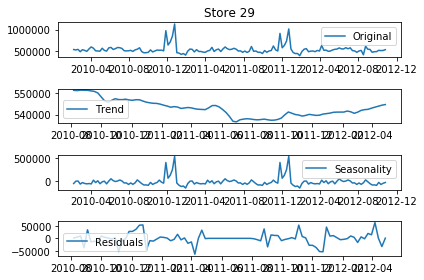

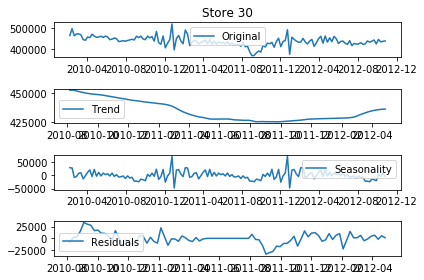

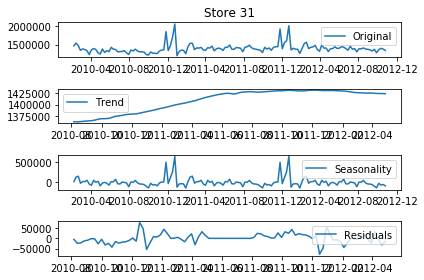

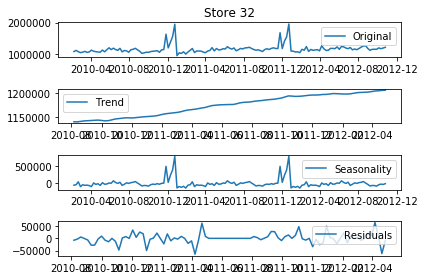

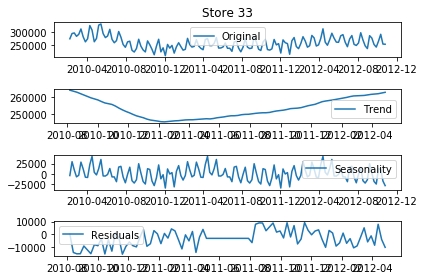

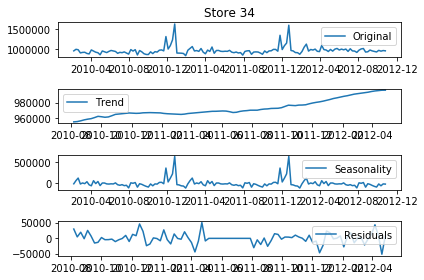

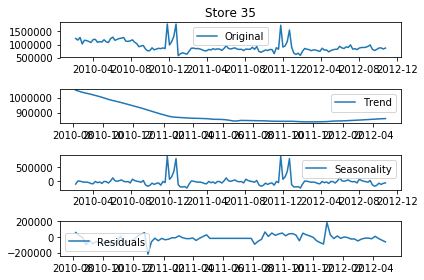

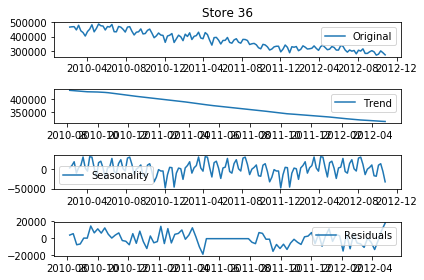

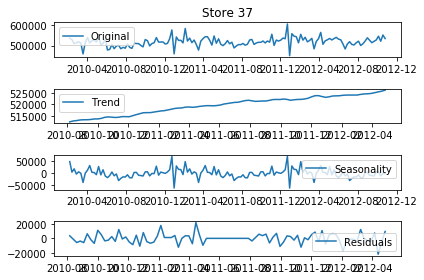

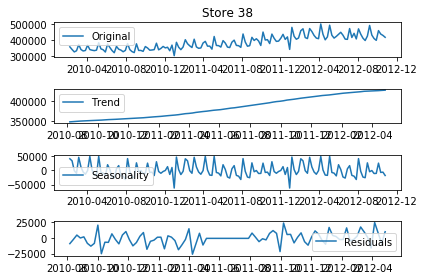

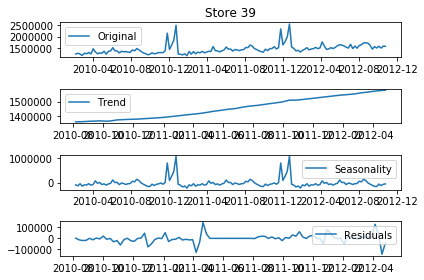

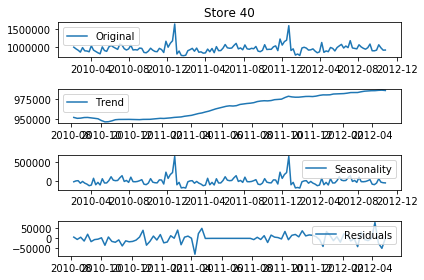

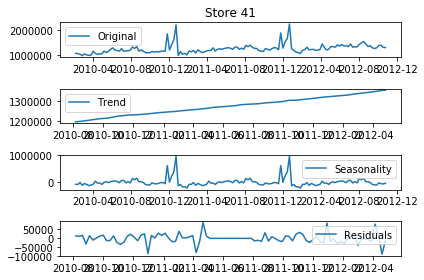

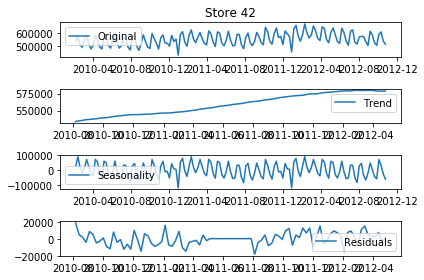

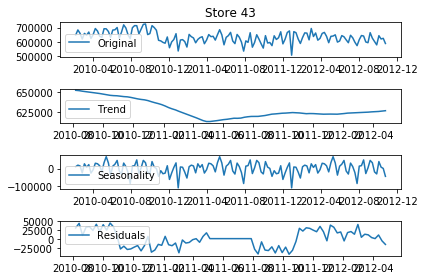

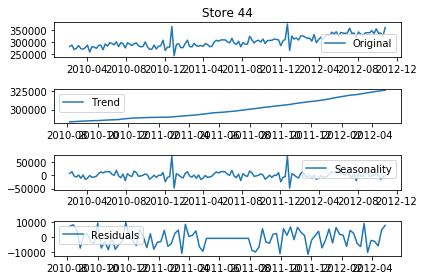

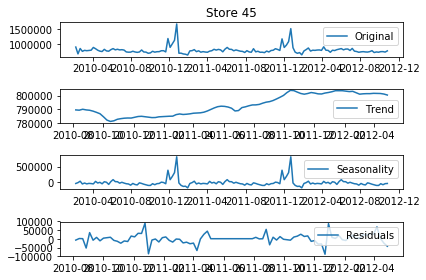

In [167]:
for i in store_list:
    ts = wsd.loc[wsd['Store']==i]
    ts = ts.reset_index() #  set index to datetime
    ts = ts.filter(['Newdate_x','Weekly_Sales'], axis=1)
    ts['Newdate_x']=pd.to_datetime(ts['Newdate_x'], dayfirst = True)
    ts = ts.set_index('Newdate_x')
    plt.figure(i)
    decompose_plot(ts)